In [1]:
import sys
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/dummy-truck-sales-for-time-series/Truck_sales.csv")
data.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [3]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

In [4]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x]) 
data['Year'] = dates.year


In [5]:
data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number_Trucks_Sold':'Truck-Sales'}, inplace=True) 
data = data[['Month', 'Year', 'Truck-Sales']]


In [6]:
#Dicker-Fuller Test: To check for stationary
data.set_index(dates, inplace=True)
data.head()

,Month,Year,Truck-Sales
2003-01-01,Jan,2003,155
2003-02-01,Feb,2003,173
2003-03-01,Mar,2003,204
2003-04-01,Apr,2003,219
2003-05-01,May,2003,223


Text(0, 0.5, 'Truck Sales')

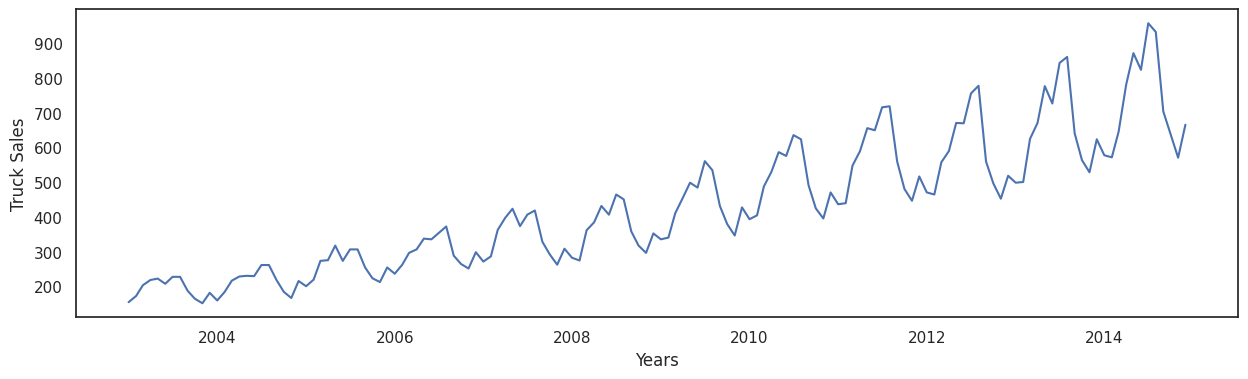

In [7]:
sales_ts = data['Truck-Sales']
sns.set(style="white", rc={'figure.figsize': (15, 4)})
plt.figure(figsize=(15, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')


In [8]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_ts)
dftest

(1.1158932574252705,
 0.9953500083802602,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1107.5217075915425)

In [9]:
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 1.116
DF test p-value is 0.9954


The p-value 0.99 is very large, and not smaller than 0.05 and thus is not a stationary series

In [10]:
#BI-VARIATE ANALYSIS
monthly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,219,229,276,307,398,385,455,530,590,590,671,781
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Dec,182,216,255,299,309,353,428,471,517,519,624,666
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Mar,204,217,274,297,363,362,411,488,548,558,625,646
May,223,231,318,338,424,432,499,587,656,671,777,872


In [11]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,155,160,201,237,272,283,336,394,437,471,499,578
Feb,173,185,220,263,287,275,341,405,440,465,501,572
Mar,204,217,274,297,363,362,411,488,548,558,625,646
Apr,219,229,276,307,398,385,455,530,590,590,671,781
May,223,231,318,338,424,432,499,587,656,671,777,872
Jun,208,230,274,336,374,407,485,576,650,670,727,824
Jul,228,262,307,354,407,465,561,636,716,756,844,958
Aug,228,262,307,373,419,451,535,624,719,778,861,933
Sep,188,219,255,289,329,359,432,492,560,560,641,704


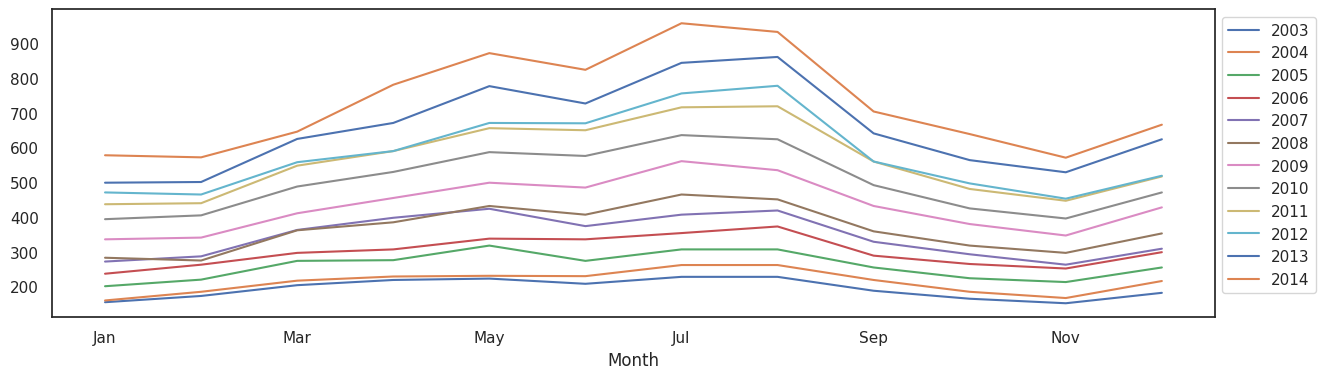

In [12]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
ax = monthly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()

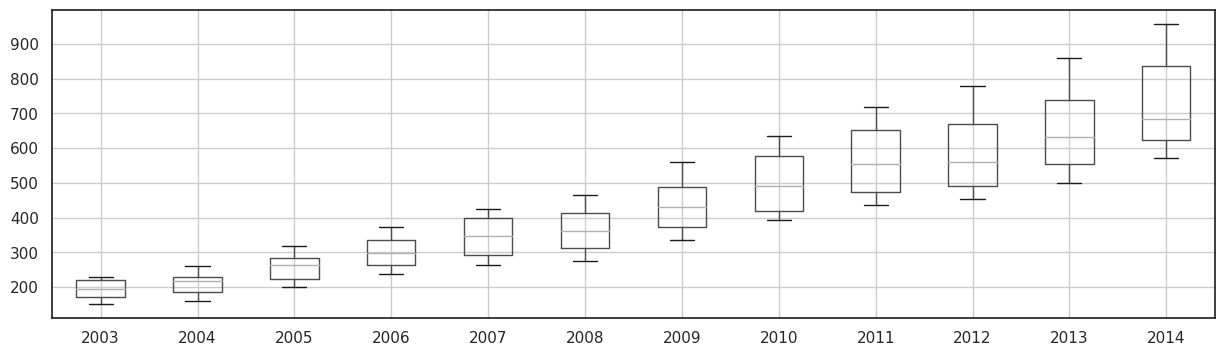

In [13]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
monthly_sales_data.boxplot()
plt.show()

In [14]:
yearly_sales_data = pd.pivot_table(data, values = "Truck-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data


Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,155,173,204,219,223,208,228,228,188,165,152,182
2004,160,185,217,229,231,230,262,262,219,185,167,216
2005,201,220,274,276,318,274,307,307,255,224,213,255
2006,237,263,297,307,338,336,354,373,289,265,252,299
2007,272,287,363,398,424,374,407,419,329,293,263,309
2008,283,275,362,385,432,407,465,451,359,318,297,353
2009,336,341,411,455,499,485,561,535,432,380,347,428
2010,394,405,488,530,587,576,636,624,492,425,396,471
2011,437,440,548,590,656,650,716,719,560,481,447,517


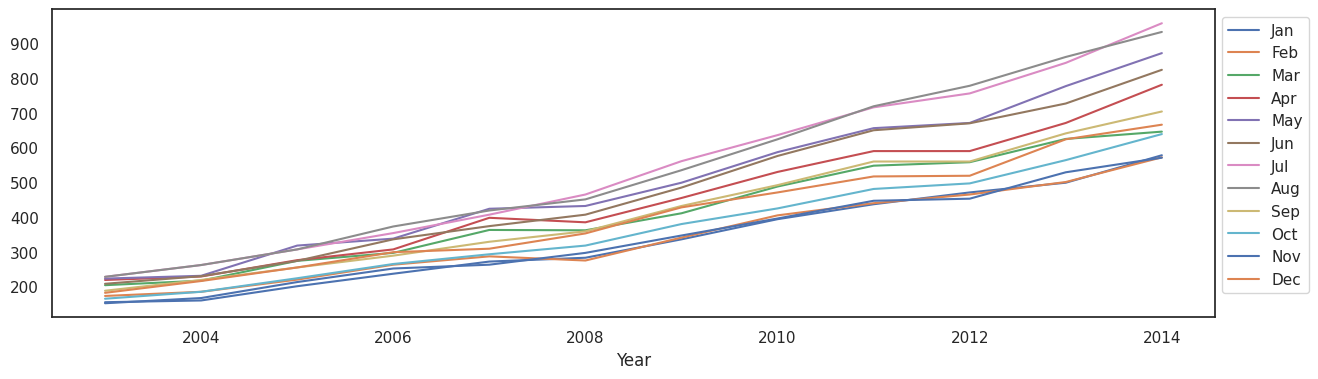

In [15]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
ax = yearly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()

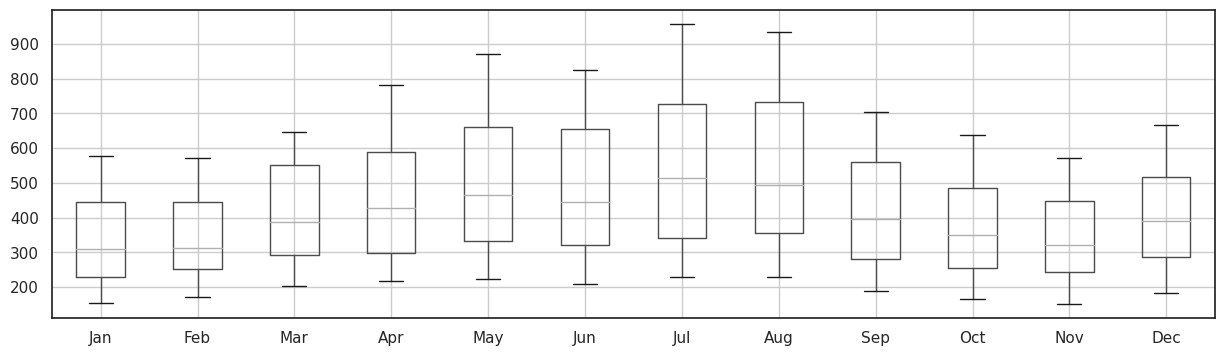

In [16]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
yearly_sales_data.boxplot()
plt.show()

In [17]:
# Time Series decomposition
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

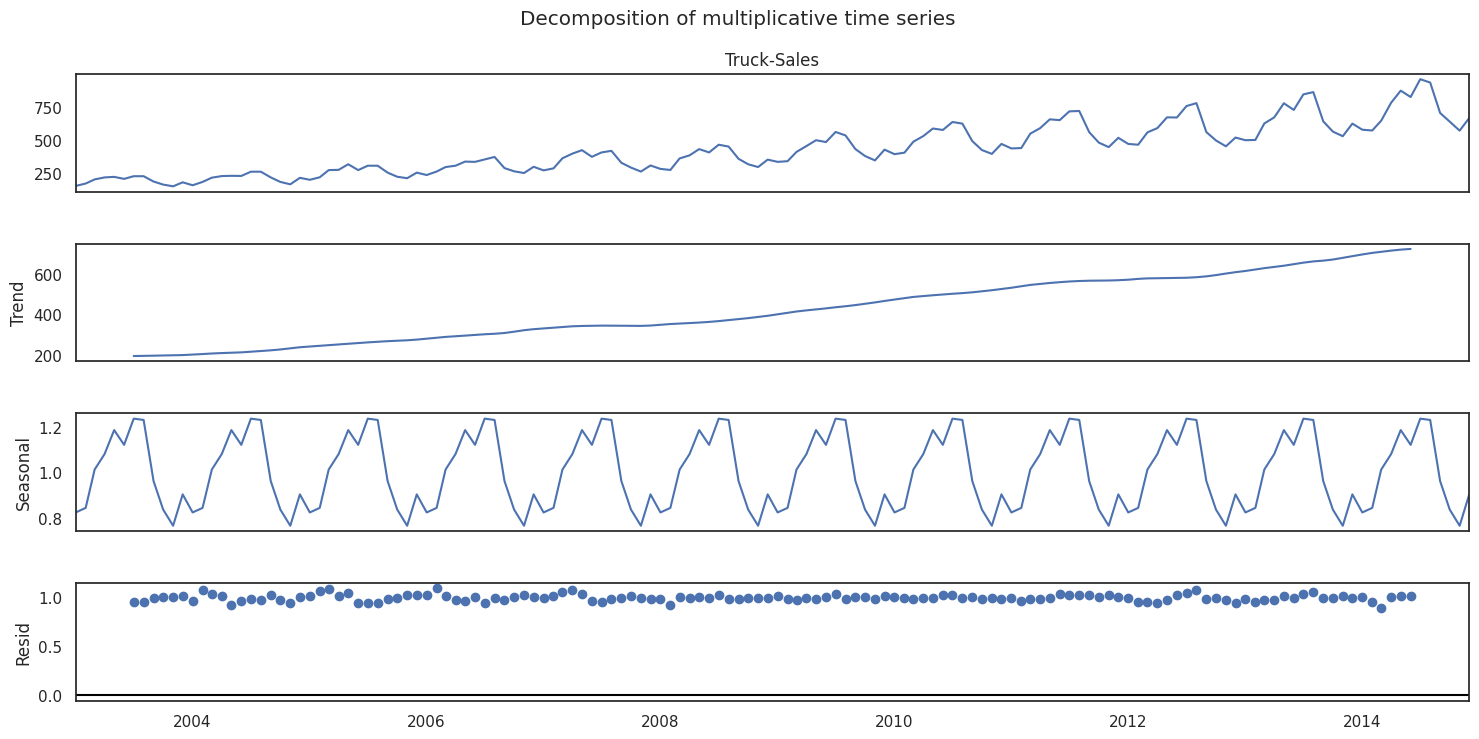

In [18]:
fig = decomposition.plot()
fig.set_figwidth(15)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()


Text(0, 0.5, 'Truck Sales')

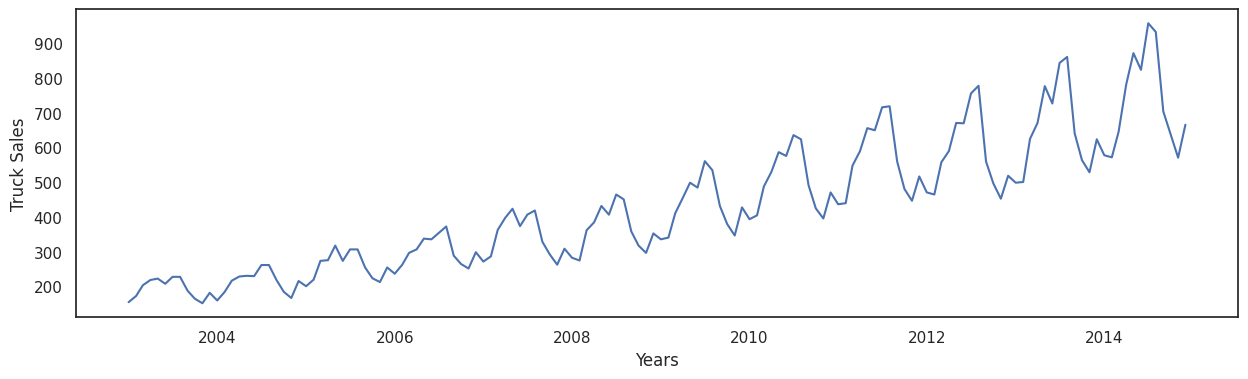

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Truck Sales')


In [32]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']


In [33]:
dftest = adfuller(train['Truck-Sales'])#Stationarity check on train time series data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])


DF test statistic is -0.484
DF test p-value is 0.8951


In [34]:
train_sales_ts_log = np.log10(train['Truck-Sales'])
#Log transformation on the training data to make the time series stationary as we did with full data


In [35]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None


ARIMA MODEL

In [57]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC


,param,AIC


In [58]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    row = {'param': param, 'AIC': ARIMA_model.aic}
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([row])], ignore_index=True)

ARIMA(1, 0, 1) - AIC:-346.4412586464684
ARIMA(1, 0, 2) - AIC:-344.4999386905523
ARIMA(1, 0, 3) - AIC:-354.4430193830395
ARIMA(1, 1, 1) - AIC:-345.29068599554273
ARIMA(1, 1, 2) - AIC:-351.20590234252205
ARIMA(1, 1, 3) - AIC:-357.3492785425969
ARIMA(2, 0, 1) - AIC:-344.4854973044182
ARIMA(2, 0, 2) - AIC:-347.28272137530416
ARIMA(2, 0, 3) - AIC:-353.7012129098199
ARIMA(2, 1, 1) - AIC:-353.37064669388076
ARIMA(2, 1, 2) - AIC:-372.89784939350983
ARIMA(2, 1, 3) - AIC:-355.4113921005117
ARIMA(3, 0, 1) - AIC:-346.96195364773087
ARIMA(3, 0, 2) - AIC:-345.3211323668892
ARIMA(3, 0, 3) - AIC:-373.7695773428325
ARIMA(3, 1, 1) - AIC:-341.58110546600375
ARIMA(3, 1, 2) - AIC:-350.8381090665089
ARIMA(3, 1, 3) - AIC:-373.685568695746


In [59]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-373.769577
17,"(3, 1, 3)",-373.685569
10,"(2, 1, 2)",-372.897849
5,"(1, 1, 3)",-357.349279
11,"(2, 1, 3)",-355.411392


In [60]:
best_model = ARIMA(train_sales_ts_log,order = (3,1,3))
best_results = best_model.fit()


In [61]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])


                               SARIMAX Results                                
Dep. Variable:            Truck-Sales   No. Observations:                  120
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 193.843
Date:                Fri, 09 Feb 2024   AIC                           -373.686
Time:                        05:46:00   BIC                           -354.232
Sample:                    01-01-2003   HQIC                          -365.786
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7307      0.173      4.213      0.000       0.391       1.071
ar.L2         -0.7804      0.068    -11.473      0.000      -0.914      -0.647
ar.L3          0.6641      0.141      4.712      0.0

In [62]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)


In [63]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [64]:
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [65]:
mse = ((testCopy1['Truck-Sales'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)


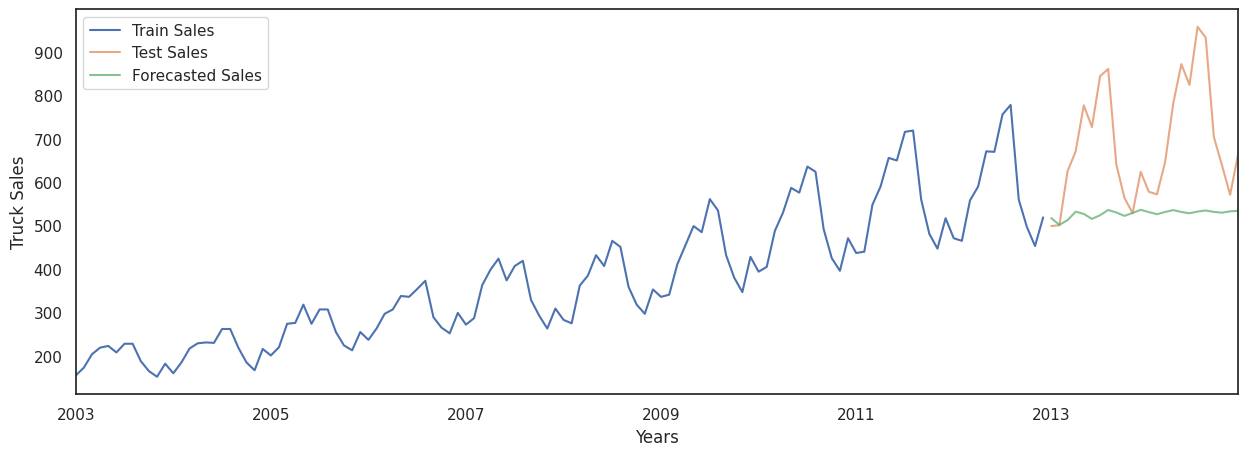

In [66]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(15, 5))
testCopy1['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [67]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf2

pd.concat([resultsDf,resultsDf1,resultsDf2])


,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153
"Best ARMA Model : ARIMA(3,0,3)",224.045726
"Best ARIMA Model : ARIMA(3,0,3)",209.161604


SARIMA MODEL

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1500x400 with 0 Axes>

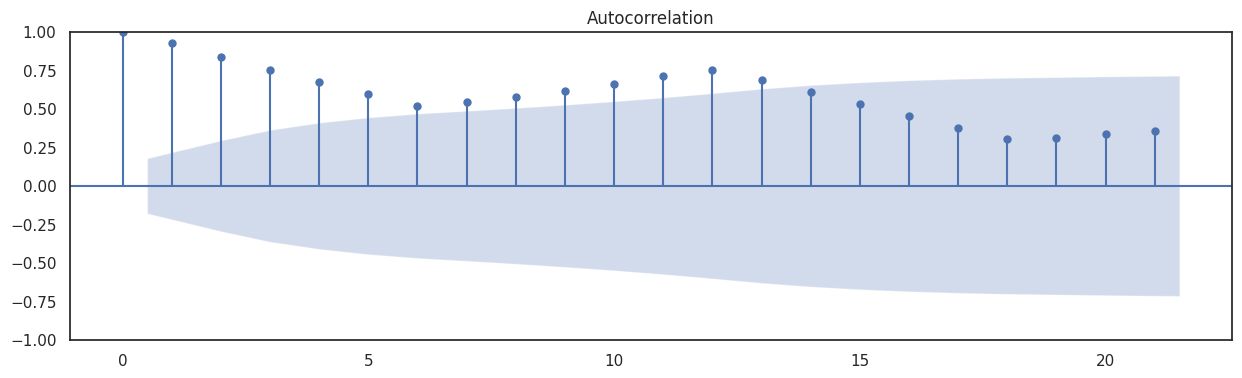

In [69]:
plt.figure(figsize=(15, 4))
plot_acf(train['Truck-Sales'],alpha=0.05);

In [70]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [71]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [72]:
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results_SARIMA = SARIMA_model.fit(maxiter=1000)
print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
SARIMA_AIC.loc[len(SARIMA_AIC)] = [param, param_seasonal, results_SARIMA.aic]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53568D+00    |proj g|=  1.26162D+01


 This problem is unconstrained.



At iterate    5    f= -1.56191D+00    |proj g|=  1.61140D-01

At iterate   10    f= -1.56919D+00    |proj g|=  6.72300D+00

At iterate   15    f= -1.65315D+00    |proj g|=  1.32277D+00

At iterate   20    f= -1.66099D+00    |proj g|=  6.18465D-01

At iterate   25    f= -1.68111D+00    |proj g|=  1.33276D+00

At iterate   30    f= -1.69576D+00    |proj g|=  1.81232D+00

At iterate   35    f= -1.70603D+00    |proj g|=  9.51493D-02

At iterate   40    f= -1.70848D+00    |proj g|=  4.58285D-01

At iterate   45    f= -1.70926D+00    |proj g|=  7.03341D-02

At iterate   50    f= -1.70989D+00    |proj g|=  4.64221D-01

At iterate   55    f= -1.71054D+00    |proj g|=  8.71595D-02

At iterate   60    f= -1.71063D+00    |proj g|=  8.44383D-02

At iterate   65    f= -1.71083D+00    |proj g|=  4.62060D-01

At iterate   70    f= -1.71088D+00    |proj g|=  2.30585D-01

At iterate   75    f= -1.71137D+00    |proj g|=  2.47836D-01

At iterate   80    f= -1.71146D+00    |proj g|=  5.34414D-02

At iter

In [73]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(3, 1, 3)","(3, 1, 3, 12)",-385.100588


In [74]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82965D+03    |proj g|=  6.60743D+04

At iterate    5    f=  1.42711D+00    |proj g|=  7.40182D-01

At iterate   10    f= -1.59631D+00    |proj g|=  1.37334D+00

At iterate   15    f= -1.63673D+00    |proj g|=  1.28953D+00

At iterate   20    f= -2.19977D+00    |proj g|=  1.77567D+01

At iterate   25    f= -2.28089D+00    |proj g|=  6.05434D-01

At iterate   30    f= -2.51234D+00    |proj g|=  4.54387D+00

At iterate   35    f= -2.51889D+00    |proj g|=  1.65550D-01

At iterate   40    f= -2.51900D+00    |proj g|=  1.22614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [75]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        Truck-Sales   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 302.280
Date:                            Fri, 09 Feb 2024   AIC                           -594.559
Time:                                    05:46:29   BIC                           -580.622
Sample:                                01-01-2003   HQIC                          -588.899
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.006    159.193      0.000       0.983       1.008
ma.L1         -0.2951      0.084   

In [76]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [77]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [78]:
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)


In [80]:
mse = ((testCopy['Truck-Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))


The Root Mean Squared Error of our forecasts is 84.272


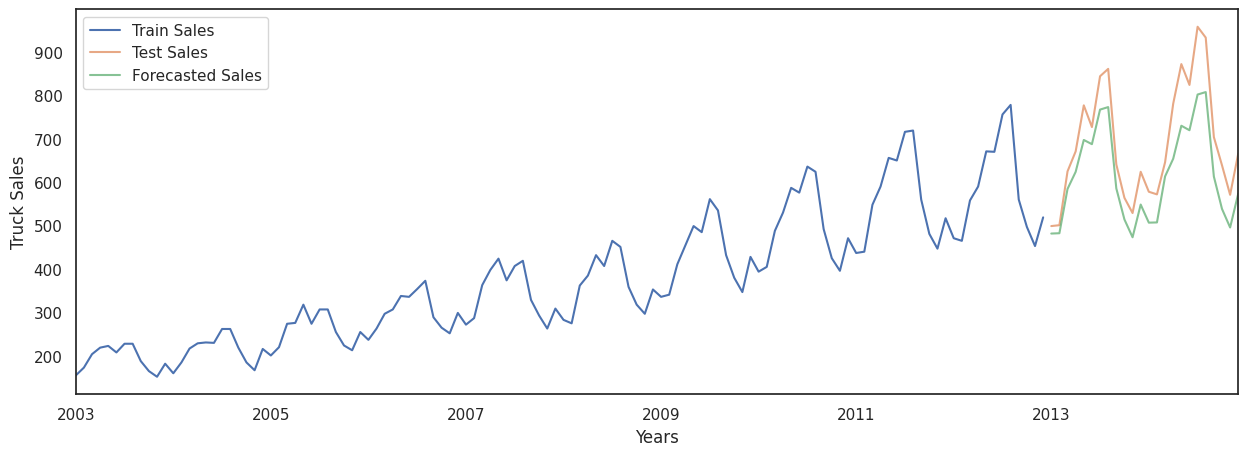

In [81]:
axis = train['Truck-Sales'].plot(label='Train Sales', figsize=(15, 5))
testCopy['Truck-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Truck Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [82]:
resultsDf3 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

pd.concat([resultsDf,resultsDf1,resultsDf2,resultsDf3])


,RMSE
"Best AR Model : ARIMA(2,0,0)",306.142153
"Best ARMA Model : ARIMA(3,0,3)",224.045726
"Best ARIMA Model : ARIMA(3,0,3)",209.161604
"Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)",84.272155
